<a href="https://colab.research.google.com/github/ucheokechukwu/ml_tensorflow_deeplearning/blob/main/02_neural_network_classification_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to neural network classification with TensorFlow

In this video, we're going to learn how to write neural networks for classification problems.
Types of classifications: 
1. Binary classification.
2. Multiclass classification
3. Multilabel classification.

## Creating data to view and fit

In [91]:
from sklearn.datasets import make_circles
# Make 1000 samples
n_samples = 1000
# Create circles
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42) # random_state is like seed to make random reproducible

In [92]:
# Check out features
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [93]:
# Check the labels
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

*Visualize... visualize... visualize...*

In [94]:
import pandas as pd
circles = pd.DataFrame({"X0": X[:,0],
                        "X1": X[:,1],
                        "label":y})

In [95]:
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


## Input and output shapes

In [96]:
# Check the shapes of our features and labels:
X.shape, y.shape

((1000, 2), (1000,))

In [97]:
# Chek the length of our samples:
len(X), len(y)

(1000, 1000)

In [98]:
# View the first example of features and labels:
X[10],y[11]

(array([-0.64249042, -0.54409929]), 0)

In [99]:
# Check the labels
circles.label.value_counts()

1    500
0    500
Name: label, dtype: int64

In [100]:
# Visualize with a plot
import matplotlib.pyplot as plt


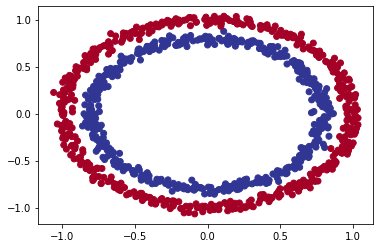

In [101]:
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.RdYlBu);

In [102]:
# Check the shapes of our features and labels
X.shape, y.shape

((1000, 2), (1000,))

In [103]:
X.shape

(1000, 2)

## Steps in modelling

In [104]:
import tensorflow as tf

In [105]:
# set random seed
tf.random.set_seed(42)

# 1. Create a model:
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation="relu")
    # tf.keras.layers.input_shape([2]),
    # tf.keras.layers.Dense(100, activation=""),
    # td.keras.layers.Dense(3, name="output_layer", activation="sigmoid")
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics="accuracy")

# 3. Fit the modelling
model_1.fit(X,y, epochs=5)



# 4. Evaluate the model

# 5. Tweak the model

# 6. Evaluate, then tweak etc...

Epoch 1/5
32/32 [==============================] - 1s 2ms/step - loss: 5.3902 - accuracy: 0.4800
Epoch 2/5
32/32 [==============================] - 0s 2ms/step - loss: 5.3350 - accuracy: 0.4800
Epoch 3/5
32/32 [==============================] - 0s 2ms/step - loss: 5.3075 - accuracy: 0.4780
Epoch 4/5
32/32 [==============================] - 0s 2ms/step - loss: 5.3011 - accuracy: 0.4780
Epoch 5/5
32/32 [==============================] - 0s 2ms/step - loss: 5.2276 - accuracy: 0.4780


Let's try and improve our model by training it for longer...

* Trying to see if accuracy improves by adding an extra layer. (0.49 accuracy is basically a coin flip)

In [106]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create a model, this time with 2 layers
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics="accuracy")

# 3 Fit the model
model_2.fit(X, y, epochs=100, verbose=0)

# 4. Evaluate the model

model_2.evaluate(X,y)

32/32 [==============================] - 0s 2ms/step - loss: 7.6246 - accuracy: 0.5000


[7.6246185302734375, 0.5]

In [107]:
circles.label.value_counts()

1    500
0    500
Name: label, dtype: int64

from IPython.utils.io import unicode_std_stream
* Improving our model...

1. Create our model - add more layers or increase the number of hidden units
2. Compiling our model - using a different optimization funciton eg. Adam instead of SGD,
3. Fitting our model - let the model train for longer

In [108]:
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

model_3.fit(X, y, epochs=100, verbose=1)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 2.2585 - accuracy: 0.4680
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7110 - accuracy: 0.4850
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6942 - accuracy: 0.4940
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6964 - accuracy: 0.4880
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6967 - accuracy: 0.4770
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6972 - accuracy: 0.4600
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6955 - accuracy: 0.5120
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6949 - accuracy: 0.5190
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6990 - accuracy: 0.4960
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6948 - accuracy: 0.4730
Epoch 11/

In [109]:
model_3.evaluate(X,y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6979 - accuracy: 0.5130


[0.6979435682296753, 0.5130000114440918]

* Observation: still getting 0.5 accuracy whichi is just as good as guessing.
Next strategy: lets try and visaulize 

In [110]:
model_1.summary()

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_45 (Dense)            (None, 1)                 3         
                                                                 
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [111]:
model_2.summary()

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_46 (Dense)            (None, 1)                 3         
                                                                 
 dense_47 (Dense)            (None, 1)                 2         
                                                                 
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


In [112]:
model_3.summary()

Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_48 (Dense)            (None, 100)               300       
                                                                 
 dense_49 (Dense)            (None, 10)                1010      
                                                                 
 dense_50 (Dense)            (None, 1)                 11        
                                                                 
Total params: 1,321
Trainable params: 1,321
Non-trainable params: 0
_________________________________________________________________


In [113]:
model_3.predict(X)

32/32 [==============================] - 0s 1ms/step


array([[0.48634604],
       [0.5620592 ],
       [0.5661856 ],
       [0.5699975 ],
       [0.4462504 ],
       [0.5737029 ],
       [0.55549496],
       [0.48123947],
       [0.48366827],
       [0.57211524],
       [0.52111346],
       [0.5268272 ],
       [0.56238896],
       [0.4591073 ],
       [0.45339254],
       [0.4662176 ],
       [0.5466962 ],
       [0.4691145 ],
       [0.55259246],
       [0.51100457],
       [0.50401896],
       [0.58694804],
       [0.4656966 ],
       [0.4894595 ],
       [0.5853562 ],
       [0.57390815],
       [0.5485051 ],
       [0.46326062],
       [0.46250606],
       [0.45651057],
       [0.48579592],
       [0.5760903 ],
       [0.5533405 ],
       [0.4621478 ],
       [0.46571153],
       [0.59053206],
       [0.5730692 ],
       [0.52668846],
       [0.46331903],
       [0.50736535],
       [0.5071987 ],
       [0.54240876],
       [0.5181241 ],
       [0.45846644],
       [0.5293311 ],
       [0.5449762 ],
       [0.45257849],
       [0.541

* Notice how all the predictions are around 0.5 and not closer to 0 or 1?
* Further visualization plotting...

  * Take in a trained model, features (X) and labels (y)
  * Create a meshgrid of the different X alues
  * Make predictions across the meshgrid
  * Plot the predictions and a line between zones where each unique class fails

In [114]:
import numpy as np

In [115]:
def plot_decision_boundary(model, X, y):
  '''
  Plots the decision borundary created by a model 
  predicting on X
  '''

  # Define the axis boundaries of the plot and create a mesh grid
  x_min, x_max = X[:,0].min() - 0.1, X[:,0].max()+ 0.1 # adding and subtracting 0.1 for margins
  y_min, y_max = X[:,1].min() - 0.1, X[:,0].max()+ 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))

  # Create X value (we're going to predict with these)
  x_in =np.c_[xx.ravel(), yy.ravel()] # np.c_ used to stack 2D arrays

  # Make predictions
  y_pred = model.predict(x_in)

  # Check if we're working on a multi-class or a binary classification
  if len(y_pred[0])>1:
    print("Doing multiclass classification")
    # We have to reshape our predictions to get them ready
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("Doing binary classification")
    y_pred = np.round(y_pred).reshape(xx.shape)

  # Plot the decision boundary
  plt.contourf(xx,yy,y_pred,cmap=plt.cm.RdYlBu,alpha=0.7)
  plt.scatter(X[:,0], X[:,1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 0s 1ms/step
Doing binary classification


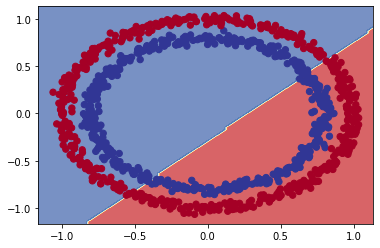

In [116]:
## Check out the predictions our model is making...
plot_decision_boundary(model_3, X, y)

* Observation: Our model is not working because it's trying to fit a straight line through circle data...

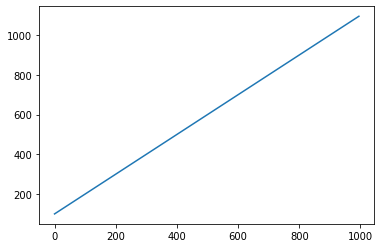

In [117]:
# Let's see if our model can be used for a regression problem...

tf.random.set_seed(42)

# Create some regression data
X_regression = tf.range(0,1000,5)
y_regression = tf.range(100,1100,5) # y = x+100

plt.plot(X_regression, y_regression)

In [119]:
# Split regression data into training and test set
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

# Fit our model to the regression data

model_3.fit(X_reg_train, y_reg_train)

ValueError: ignored

* Oh wait... we compiled our model for a Binary classification problem. But we're now working on a regression. Let's change the model to suit our data.

In [120]:
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_4.compile(loss=tf.keras.losses.mean_absolute_error,
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics="mae")

history = model_4.fit(tf.expand_dims(X_reg_train, axis=-1), y_reg_train, epochs=100)

Epoch 1/100
5/5 [==============================] - 3s 7ms/step - loss: 466.6970 - mae: 466.6970
Epoch 2/100
5/5 [==============================] - 0s 14ms/step - loss: 363.4233 - mae: 363.4233
Epoch 3/100
5/5 [==============================] - 0s 12ms/step - loss: 263.0715 - mae: 263.0715
Epoch 4/100
5/5 [==============================] - 0s 5ms/step - loss: 158.0435 - mae: 158.0435
Epoch 5/100
5/5 [==============================] - 0s 6ms/step - loss: 58.7803 - mae: 58.7803
Epoch 6/100
5/5 [==============================] - 0s 10ms/step - loss: 73.2848 - mae: 73.2848
Epoch 7/100
5/5 [==============================] - 0s 5ms/step - loss: 76.6437 - mae: 76.6437
Epoch 8/100
5/5 [==============================] - 0s 5ms/step - loss: 50.7762 - mae: 50.7762
Epoch 9/100
5/5 [==============================] - 0s 5ms/step - loss: 46.8602 - mae: 46.8602
Epoch 10/100
5/5 [==============================] - 0s 5ms/step - loss: 47.0749 - mae: 47.0749
Epoch 11/100
5/5 [==============================

2/2 [==============================] - 0s 5ms/step


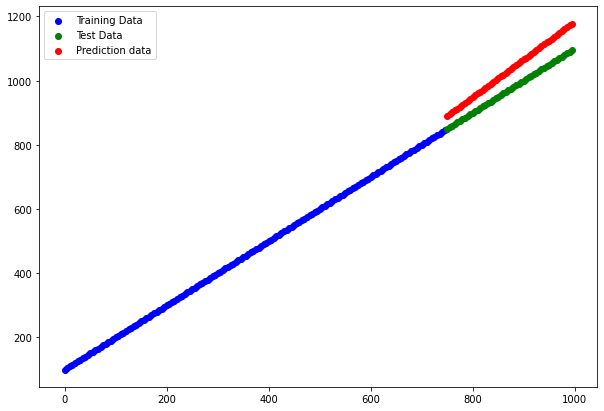

In [121]:
# Make predictions with our trained model
y_reg_preds = model_4.predict(X_reg_test)

# Plot the model's predictions against our groundtruth?

plt.figure(figsize=(10,7))
plt.scatter(X_reg_train, y_reg_train, c="b", label="Training Data")
plt.scatter(X_reg_test, y_reg_test, c="g", label="Test Data")
plt.scatter(X_reg_test, y_reg_preds, c="r", label="Prediction data")
plt.legend()

### The missing piece: non-linearity

In [122]:
tf.random.set_seed(42)
model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation="linear", input_shape=[2])
])

model_5.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics="accuracy")
model_5.summary()

Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_54 (Dense)            (None, 1)                 3         
                                                                 
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [123]:
tf.random.set_seed(42)
model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.linear, input_shape=[2])
])

model_6.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics="accuracy")
model_6.summary()

Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_55 (Dense)            (None, 1)                 3         
                                                                 
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [124]:
history = model_6.fit(X,y,epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 6.0364 - accuracy: 0.4910
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 6.0204 - accuracy: 0.4920
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 6.0199 - accuracy: 0.4920
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 6.0195 - accuracy: 0.4920
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 6.0191 - accuracy: 0.4920
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 6.0188 - accuracy: 0.4920
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 6.0184 - accuracy: 0.4920
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 6.0180 - accuracy: 0.4920
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 6.0177 - accuracy: 0.4920
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 6.0172 - accuracy: 0.4920
Epoch 11/

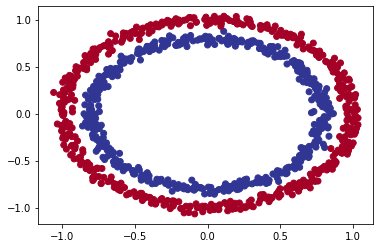

In [125]:
# Check out our data
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.RdYlBu);

/usr/local/lib/python3.8/dist-packages/pandas/plotting/_matplotlib/core.py:711: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  return ax.plot(*args, **kwds)
/usr/local/lib/python3.8/dist-packages/pandas/plotting/_matplotlib/core.py:711: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  return ax.plot(*args, **kwds)


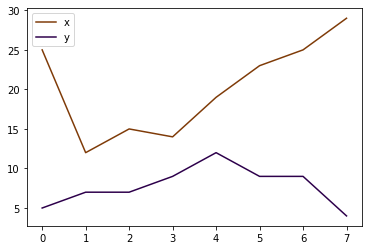

In [126]:
import pandas as pd

#create DataFrame
df = pd.DataFrame({'x': [25, 12, 15, 14, 19, 23, 25, 29],
                   'y': [5, 7, 7, 9, 12, 9, 9, 4],
                   'z': ['A', 'A', 'B', 'B', 'B', 'C', 'C', 'C']})

df.plot(c=df.z, cmap=plt.cm.PuOr);

313/313 [==============================] - 0s 1ms/step
Doing binary classification


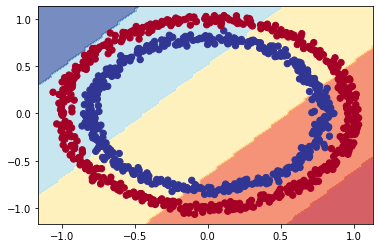

In [127]:
# Check the decision boundary of model_5
plot_decision_boundary(model = model_6, X=X, y=y)

In [128]:
# Let's try to build our first neural network with non-linear activation function.
# Trying activation - relu

In [129]:
tf.random.set_seed(42)
model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation = "relu")
])
model_7.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics="mae")
history=model_7.fit(X,y,epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 6.3895 - mae: 0.6141
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 6.3869 - mae: 0.6119
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 6.3848 - mae: 0.6119
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 6.3832 - mae: 0.6108
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 6.3823 - mae: 0.6106
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 6.3737 - mae: 0.6091
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 6.3702 - mae: 0.6087
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 6.3677 - mae: 0.6072
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 6.3669 - mae: 0.6066
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 6.3475 - mae: 0.6033
Epoch 11/100
32/32 [==============================] - 0s 2m

313/313 [==============================] - 1s 2ms/step
Doing binary classification


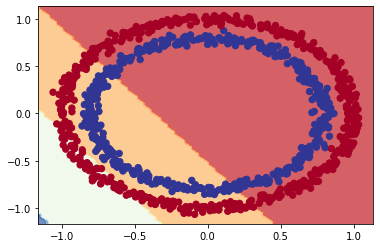

In [130]:
# Check the decision boundary of model_7
plot_decision_boundary(model = model_7, X=X, y=y)

In [131]:
# Replicating multi-layer neural network

tf.random.set_seed(42)

model_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu")
])

model_8.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics="accuracy")

history = model_8.fit(X,y,epochs=300)

Epoch 1/300
32/32 [==============================] - 1s 2ms/step - loss: 4.0734 - accuracy: 0.2930
Epoch 2/300
32/32 [==============================] - 0s 2ms/step - loss: 3.1895 - accuracy: 0.1350
Epoch 3/300
32/32 [==============================] - 0s 2ms/step - loss: 2.5901 - accuracy: 0.1220
Epoch 4/300
32/32 [==============================] - 0s 2ms/step - loss: 2.0983 - accuracy: 0.1180
Epoch 5/300
32/32 [==============================] - 0s 2ms/step - loss: 1.8988 - accuracy: 0.1400
Epoch 6/300
32/32 [==============================] - 0s 2ms/step - loss: 1.7970 - accuracy: 0.1530
Epoch 7/300
32/32 [==============================] - 0s 2ms/step - loss: 1.6786 - accuracy: 0.1590
Epoch 8/300
32/32 [==============================] - 0s 2ms/step - loss: 1.5335 - accuracy: 0.1670
Epoch 9/300
32/32 [==============================] - 0s 2ms/step - loss: 1.3827 - accuracy: 0.1780
Epoch 10/300
32/32 [==============================] - 0s 2ms/step - loss: 1.0846 - accuracy: 0.2440
Epoch 11/

313/313 [==============================] - 1s 2ms/step
Doing multiclass classification


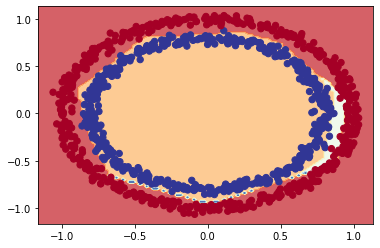

In [132]:
# Check the decision boundary of model_8
plot_decision_boundary(model = model_8, X=X, y=y)

* Note: we have not put an activation on the output layer

In [ ]:
tf.random.set_seed(42)

model_9= tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid") # this is the output layer. 1 output for a binary classification

])

model_9.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics="accuracy")



In [135]:
model_9.fit(X,y, epochs=100)

Epoch 1/100
32/32 [==============================] - 0s 5ms/step - loss: 0.5319 - accuracy: 0.7870
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 0.5290 - accuracy: 0.7830
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 0.5251 - accuracy: 0.7880
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 0.5222 - accuracy: 0.7990
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 0.5183 - accuracy: 0.7950
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 0.5139 - accuracy: 0.7960
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 0.5086 - accuracy: 0.8060
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 0.5048 - accuracy: 0.7990
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 0.5006 - accuracy: 0.8070
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 0.4960 - accuracy: 0.8050
Epoch 11/

313/313 [==============================] - 0s 1ms/step
Doing binary classification


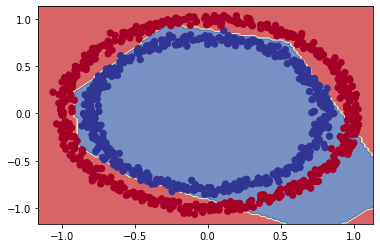

In [136]:
# Check the decision boundary of model_9
plot_decision_boundary(model = model_9, X=X, y=y)

**Note**: The combination of linear and non-linear functions is how neural networks works.
 

In [137]:
# We will create a toy tensor A to explore the activation function sigmoid
A = tf.cast(tf.range(-10,10), tf.float32)

In [158]:
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

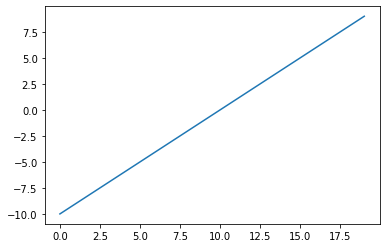

In [139]:
plt.plot(A)

### Exploring the non-linear activation function.  

#### `sigmoid` 
Let's start by replicating sigmoid where sigmoid(x) = 1/(1+exp(-x))

In [143]:
def sigmoid(x):
  return 1/(1+tf.exp(-x))

In [144]:
# Use the sigmoid on our toy tensor and plot it:
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

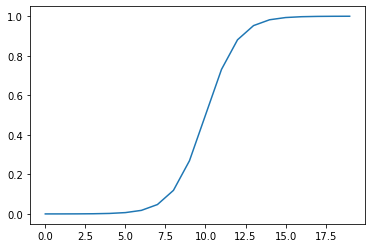

In [145]:
plt.plot(sigmoid(A))

#### `relu` activation function

In [151]:
def relu(x):
  return tf.maximum(0,x)

In [152]:
relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

In [153]:
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

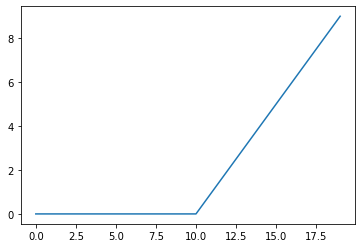

In [154]:
plt.plot(relu(A))

#### `linear` activation function:
It returns the input *unmodified*! 😮

In [159]:
tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

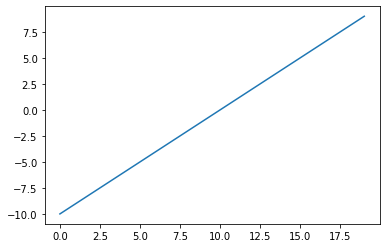

In [156]:
# does it really not change anything?
plt.plot(tf.keras.activations.linear(A))

In [160]:
A == tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])>

* This completely explains why the model couldn't learn any patterns in the non-linear data because the activation function was linear. 

## Evaluating and Improving our Classification Models

So far we've been training and testing on the same dataset which is WRONG!

In [162]:
# Check how many samples we have:
len(X), len(y)

(1000, 1000)

In [164]:
from sklearn.model_selection import train_test_split

In [168]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [169]:
X_train.shape, X_test.shape

((800, 2), (200, 2))

In [170]:
y_train.shape, y_test.shape

((800,), (200,))

In [173]:
# Let's recreate the model to fit on the training data and evaluate on the test data

tf.random.set_seed(42)

model_10 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])
model_10.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                 metrics="accuracy")



In [174]:
history = model_10.fit(X_train, y_train, epochs=25) 

Epoch 1/25
25/25 [==============================] - 1s 2ms/step - loss: 0.6933 - accuracy: 0.5075
Epoch 2/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6821 - accuracy: 0.5462
Epoch 3/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6771 - accuracy: 0.5537
Epoch 4/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6700 - accuracy: 0.5612
Epoch 5/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6579 - accuracy: 0.6025
Epoch 6/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6298 - accuracy: 0.7262
Epoch 7/25
25/25 [==============================] - 0s 2ms/step - loss: 0.5897 - accuracy: 0.8500
Epoch 8/25
25/25 [==============================] - 0s 2ms/step - loss: 0.5333 - accuracy: 0.9162
Epoch 9/25
25/25 [==============================] - 0s 2ms/step - loss: 0.4831 - accuracy: 0.8863
Epoch 10/25
25/25 [==============================] - 0s 2ms/step - loss: 0.4092 - accuracy: 0.9725
Epoch 11/25
25/25 [

In [176]:
# Evaluate the model on the test data set
model_10.evaluate(X_test,y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.0531 - accuracy: 0.9950


[0.053084276616573334, 0.9950000047683716]

313/313 [==============================] - 1s 2ms/step
Doing binary classification
313/313 [==============================] - 0s 1ms/step
Doing binary classification


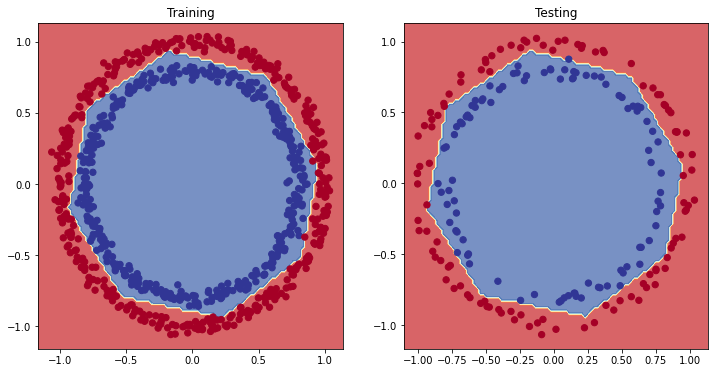

In [178]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Training")
plot_decision_boundary(model = model_10, X=X_train, y=y_train)
plt.subplot(1,2,2)
plt.title("Testing")
plot_decision_boundary(model = model_10, X=X_test, y=y_test)

### Plot the loss curves
* Why? *visualize visualize VISUALIZE!*

In [180]:
history.history

{'loss': [0.6932744383811951,
  0.6821123361587524,
  0.6770715117454529,
  0.6699527502059937,
  0.6578760743141174,
  0.6298267841339111,
  0.5897340178489685,
  0.5332821607589722,
  0.48308879137039185,
  0.40917155146598816,
  0.3340962529182434,
  0.27777299284935,
  0.21932949125766754,
  0.1816611886024475,
  0.14929215610027313,
  0.12699748575687408,
  0.10958221554756165,
  0.09741091728210449,
  0.0817236602306366,
  0.07366391271352768,
  0.06760594993829727,
  0.06059808284044266,
  0.055903177708387375,
  0.04997587576508522,
  0.04718213900923729],
 'accuracy': [0.5074999928474426,
  0.5462499856948853,
  0.5537499785423279,
  0.5612499713897705,
  0.6025000214576721,
  0.7262499928474426,
  0.8500000238418579,
  0.9162499904632568,
  0.8862500190734863,
  0.9725000262260437,
  0.987500011920929,
  0.9900000095367432,
  0.9912499785423279,
  0.9962499737739563,
  0.9962499737739563,
  0.9950000047683716,
  0.9962499737739563,
  0.9912499785423279,
  0.9987499713897705,


In [182]:
pd.DataFrame(history.history)

,loss,accuracy
0,0.693274,0.50750
1,0.682112,0.54625
2,0.677072,0.55375
3,0.669953,0.56125
4,0.657876,0.60250
5,0.629827,0.72625
6,0.589734,0.85000
7,0.533282,0.91625
8,0.483089,0.88625
9,0.409172,0.97250


Text(0.5, 1.0, 'Model 10 Loss Curves')

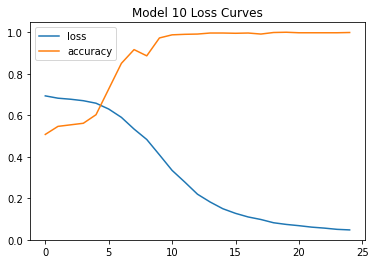

In [184]:
pd.DataFrame(history.history).plot()
plt.title ("Model 10 Loss Curves")

* Note that for many problems, the loss function going down means the model is improving and predictions are approaching groundtruth labels.